# Inversi Linear
 
Inversi linear berarti hubungan antara data dengan model dapat dituangkan dalam sebuah persamaan yang linear, tentunya yang memenuhi syarat linearitas. Pada inversi linear ini biasanya hubungan antara data dengan model dapat dituangkan dalam persamaan maju:
 
$$ d=Gm, $$
 
dengan $d$ adalah berupa vektor data berukuran $M \times 1$, $G$ adalah matriks kernel atau Jacobian dengan ukuran $M \times N$, dab $m$ adalah vektor model dengan ukuran $N \times 1$. Solusi Least Square untuk inversi linear ini biasanya didapatkan dengan:
 
$$m=(G^TG)^{-1}G^Td$$

## Solusi Persamaan Garis Lurus
 
Sebagai contoh disini kita akan mencari solusi untuk sebuah persamaan garis lurus yang biasanya dituliskan dalam $y=bx+c$, dimana parameter model yang kita cari adalah nilai gradien $b$ dan intersep $c$ menggunakan data $y$. Data yang kita punya adalah:
 
| No  | x  |   y|
|---|---|---|
| 1  |  2 | 5  |
|  2 |  3 | 7  |
|3|4|9|
|  4 | 5  |  11 |
 
Kita plot terlebih dahulu:

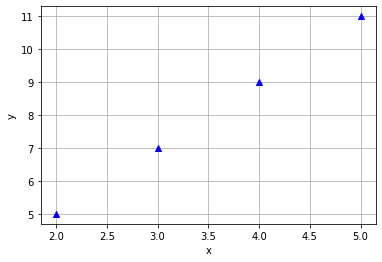

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([2,3,4,5])
y=np.array([5,7,9,11])
 
plt.scatter(x,y,zorder=110, color="blue", marker="^")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

Kita kemudian terjemahkan data dan Jacobian dalam Python:

In [38]:
import numpy as np
 
d=np.array([5,7,9,11])
 
G=np.array([[2, 1],
            [3, 1],
            [4, 1],
            [5, 1]])

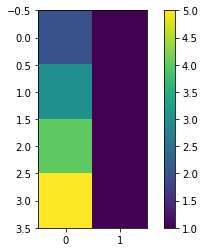

In [44]:
plt.imshow(G)
plt.colorbar()

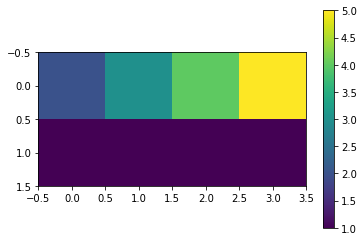

In [45]:
plt.imshow(G.T)
plt.colorbar()

Selanjutnya kita menghitung aljabar untuk beberapa operator yang kita butuhkan:

In [ ]:
GTd = G.T @ d
GTd

array([122,  32])

In [46]:
GTG = (G.T @ G)
GTGinv = np.linalg.inv(GTG)
GTGinv

array([[ 0.2, -0.7],
       [-0.7,  2.7]])

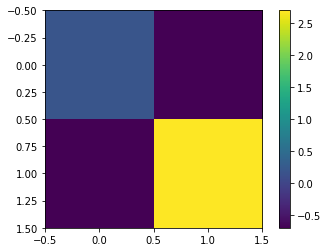

In [47]:
plt.imshow(GTGinv)
plt.colorbar()

Selanjutnya model dapat kita cari:

In [ ]:
m = GTGinv @ GTd
# m = np.matmul(GTGinv, GTd) #alternative
m

array([2., 1.])

Dari perhitungan kita mendapatkan nilai gradien $b$ adalah 2 dan intersep $c$ adalah 1, selanjutnya coba kita plot hasil perhitungan tersebut

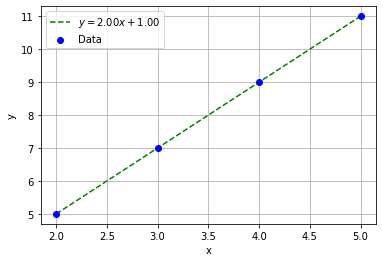

In [49]:
import matplotlib.pyplot as plt
 
x=np.array([2,3,4,5])
y=np.array([5,7,9,11])
 
plt.scatter(x,y,zorder=110, label="Data", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
 
 
# hasil perhitungan
b=m[0]
c=m[1]
y_calc=b*x+c
 
plt.plot(x,y_calc, linestyle="--", color="green", \
    label="$y={:.2f}x+{:.2f}$".format(b,c))
 
plt.legend()
plt.show()

## Solusi Persamaan Garis Lurus dengan Noise
 
Kita akan berikan noise pada data $d$, noise random dengan rerata 0 dan deviasi standar 0,5:

In [51]:
d

array([ 5,  7,  9, 11])

In [50]:
noise=np.random.normal(0, 0.5, len(d))
 
d_noise = d+noise
d_noise

array([ 5.36349793,  7.74278525,  8.3757196 , 11.03219363])

Kita plot terlebih dahulu:

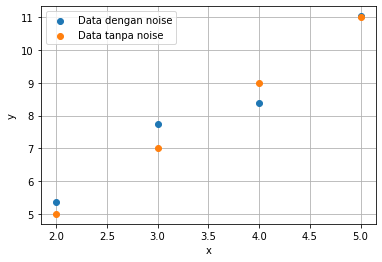

In [52]:
import matplotlib.pyplot as plt
 
x=np.array([2,3,4,5])
y=np.array([5,7,9,11])
 
plt.scatter(x,d_noise,zorder=110, label="Data dengan noise")
plt.scatter(x,d,zorder=110, label="Data tanpa noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

Dengan cara yang sama kita dapat menghitung model:

In [53]:
GTd_noise = G.T @ d_noise
m_noise = GTGinv @ GTd_noise
m_noise

array([1.76390215, 1.95489159])

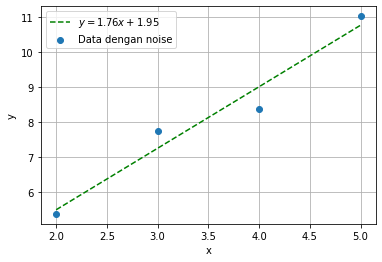

In [55]:
plt.scatter(x,d_noise,zorder=110, label="Data dengan noise")
#plt.scatter(x,d,zorder=100, label="Data tanpa noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
 
 
# hasil perhitungan
b=m_noise[0]
c=m_noise[1]
yln=b*x+c
 
plt.plot(x,yln, linestyle="--", color="green", \
    label="$y={:.2f}x+{:.2f}$".format(b,c))
 
plt.legend()
plt.show()

## Kuantifikasi Error
 
Error dapat kita kuantifikasi dengan menggunakan L2 norm yang dapat diterjemahkan dalam Python:

In [56]:
diff = d_noise - y_calc
 
misfit = diff.T @ diff
misfit

1.0746231308451344

In [57]:
diff

array([ 0.36349793,  0.74278525, -0.6242804 ,  0.03219363])

# Inversi Dilinearisasi
 
Inversi pada masalah nonlinear biasanya dilinearisasi dengan pendekatan deret Taylor sampai orde kedua, inversi dilakukan pada ruang sempit error model dan error data.

## Inversi hiposenter
 
Contoh kasus yang akan kita gunakan adalah perhitungan episenter, untuk mempermudah kita akan menganggap bawah permukaan merupakan medium homogen, kasus yang kita hadapi adalah:

![geigermerapi](img/merapi_stations.png)

Stasiun-stasiun di bawah ini merekam gempa Vukano Tektonik dengan waktu tiba gelombang P dijabarkan pada tabel di atas, waktu 0s adalah 17.00.00 WIB.
Jika kecepatan homogen 3 km/s, cari hiposenter !

| id	| nama	| alt| 	x	[m]| y [m]| arr [s]
|---|---|---|---|---| --- |
|1	|Gemer	|1331|	435634|	9166075| 1.2689472 |
|2	|Klatakan	|1880	|437186|	9167475| 1.11920458 |
|3|	Selo|	1883|	439270|	9168756| 1.23894408 |
|4|	Pasar Bubar|	2569|	439845|	9166732| 1.26084491 |
|5|	Kendil|	1622|	439937|	9164018 | 1.2827079|

Persamaan maju yang menghubungkan data berupa waktu tiba ($T_{arr}$) dengan model yang kita cari ($T_0$, $x$,$y$,$z$) adalah:
 
$$T_{arr}=T_0 + \frac{\sqrt{(x-x_s)^2+(y-y_s)^2+(z-z_s)^2}}{v},$$
 
dengan $x_s$,$y_s$,$z_s$ menunjukkan lokasi stasiun.
 
Menggunakan ekspansi Taylor sampai orde dua kita mendapatkan:
 
$$ m = m_0 + \Delta m $$
 
dengan $m_0$ merupakan tebakan awal dan $\Delta m$ merupakan koreksi dari model kita.
 
Nilai $\Delta m$ dapat kita estimasi dengan Least Square:
 
$$\Delta m=(G^TG)^{-1}G^T \Delta d$$ 
 
dengan $G$ berisi turunan parsial persamaan maju terhadap masing-masing model.
 
Kemudian dapat membuat Jacobian tersebut dengan isi masing-masing adalah:
 
\begin{bmatrix}
 \frac{x-x_{s1}}{vD_1} & \frac{y-y_{s1}}{vD_1}  & \frac{z-z_{s1}}{vD_1}  & 1 \\ 
\frac{x-x_{s2}}{vD_2} & \frac{y-y_{s2}}{vD_2}  & \frac{z-z_{s2}}{vD_2}  & 1 \\  
 \vdots & \vdots &  \vdots & \vdots\\ 
 \frac{x-x_{sN}}{vD_N} & \frac{y-y_{sN}}{vD_N}  & \frac{z-z_{sN}}{vD_N}  & 1 \\ 
\end{bmatrix}
 
Tugas utama kita adalah membuat matriks $G$ di atas menggunakan loop.

## Menghitung G

In [66]:
import math

# Iterasi 1

# true 
# 438613, 9166504, -1000, 0

# mendefinisikan kecepatan
v = 3000 #m/s

# menebak hiposenter
x, y, z, T0 = 437000, 9167000, -900, 0.5

# mendefinisikan data
zss = np.array([1331, 1880, 1883, 2569, 1622])
xss = np.array([435634, 437186, 439270, 439845, 439937])
yss = np.array([9166075, 9167475, 9168756, 9166732, 9164018])
arrs = np.array([1.2689472, 1.11920458, 1.23894408, 1.26084491, 1.2827079])		

# membuat fungsi untuk menghitung jarak
def distance(xs,ys,zs,x,y,z):
  x2 = (xs-x)**2
  y2 = (ys-y)**2
  z2 = (zs-z)**2
  d2 = x2 + y2 +z2
  d = math.sqrt(d2)
  return d

# looping untuk menghitung G
for xs, ys, zs, i in zip(xss, yss, zss, range(len(xss))):
  dist_s = distance(xs, ys, zs, x, y, z) #di
  komp_x = (x - xs)/(v*dist_s)
  komp_y = (y - ys)/(v*dist_s)
  komp_z = (z - zs)/(v*dist_s) 
  komp_T = 1

  baris = np.array([komp_x, komp_y, komp_z, komp_T]) 

  if i == 0:
    G = baris
  elif i != 0:
    G = np.vstack((G, baris))

G


array([[ 1.64102018e-04,  1.11123255e-04, -2.68017278e-04,
         1.00000000e+00],
       [-2.19359163e-05, -5.60191411e-05, -3.27859394e-04,
         1.00000000e+00],
       [-1.89275976e-04, -1.46417891e-04, -2.32050678e-04,
         1.00000000e+00],
       [-2.11002390e-04,  1.98764993e-05, -2.57282000e-04,
         1.00000000e+00],
       [-2.00344144e-04,  2.03413768e-04, -1.72035387e-04,
         1.00000000e+00]])

## Melakukan Inversi

In [69]:
d = arrs
GTG = G.T @ G
GTGinv = np.linalg.inv(GTG)

# delta d? -> mencari d_calc [forward]
def t_arr_calc(xs,ys,zs,x,y,z,t0):
  t_arr = t0 + (distance(xs,ys,zs,x,y,z)/v)
  return t_arr

# persamaan maju
d_calc = [t_arr_calc(xs, ys, zs, x, y, z, T0) for xs,ys,zs in zip(xss,yss,zss)]
d_calc = np.array(d_calc)

# menghitung delta_d
delta_d = d - d_calc

# melakukan inversi
GTdeltad = G.T @ delta_d
delta_m = GTGinv @ GTdeltad
delta_m

array([ 1.66867342e+03, -6.21185613e+02, -3.95661424e+02, -4.61280597e-01])

## Mengoreksi model

In [71]:
m0 = np.array([x, y, z, T0]) #tebakan
m1 = m0 + delta_m

for mm in m1:
  print(mm)

438668.673417057
9166378.814387046
-1295.661424396385
0.03871940261794293


## Menggabungkan dalam 1 proses banyak iterasi

In [85]:
import math

# Iterasi 1
# true hiposenter dan origin time
xt, yt, zt, T0t =  438613, 9166504, -1000, 0
print("Sebenarnya: ", xt, yt, zt, T0t)

# mendefinisikan kecepatan
v = 3000 #m/s

# menebak hiposenter
x, y, z, T0 = 437000, 9167000, -1500, 0.5
print("Tebakan: ", x, y, z, T0)

# mendefinisikan data [arr] dan koordinat stasiun
zss = np.array([1331, 1880, 1883, 2569, 1622])
xss = np.array([435634, 437186, 439270, 439845, 439937])
yss = np.array([9166075, 9167475, 9168756, 9166732, 9164018])
arrs = np.array([1.2689472, 1.11920458, 1.23894408, 1.26084491, 1.2827079])	

# membuat fungsi untuk menghitung jarak (phytagoras)
def distance(xs,ys,zs,x,y,z):
  x2 = (xs-x)**2
  y2 = (ys-y)**2
  z2 = (zs-z)**2
  d2 = x2 + y2 +z2
  d = math.sqrt(d2)
  return d

# membuat fungsi pemodelan maju
def t_arr_calc(xs,ys,zs,x,y,z,t0):
  t_arr = t0 + (distance(xs,ys,zs,x,y,z)/v)
  return t_arr

# Melakukan perulangan
iterasi = 10
for i in range(iterasi):
  # looping untuk menghitung G per baris/stasiun
  for xs, ys, zs, u in zip(xss, yss, zss, range(len(xss))):
    dist_s = distance(xs, ys, zs, x, y, z) #jarak stasiun-hiposenter tebakan
    komp_x = (x - xs)/(v*dist_s)
    komp_y = (y - ys)/(v*dist_s)
    komp_z = (z - zs)/(v*dist_s) 
    komp_T = 1

    baris = np.array([komp_x, komp_y, komp_z, komp_T]) 

    # menumpuk baris-baris
    if u == 0: # jika stasiun 1 maka matriks diisi baris tersebut
      G = baris
    elif u != 0: # jika stasiun selanjutnya maka matrik ditumpuk dg baris
      G = np.vstack((G, baris))
    
  # pemodelan maju
  d_calc = [t_arr_calc(xs, ys, zs, x, y, z, T0) for xs,ys,zs in zip(xss,yss,zss)]
  d_calc = np.array(d_calc)

  # definisikan GTGinv dan GTdeltad
  d = arrs
  GTG = G.T @ G
  GTGinv = np.linalg.inv(GTG)
  delta_d = d - d_calc
  GTdeltad = G.T @ delta_d

  # inversi untuk mencari delta m
  delta_m = GTGinv @ GTdeltad
  
  # mengoreksi model dengan delta_m
  x = x + delta_m[0]
  y = y + delta_m[1]
  z = z + delta_m[2]
  T0 = T0 + delta_m[3]

  # menghitung misfit
  # forward model dg hasil baru
  d_calc = [t_arr_calc(xs, ys, zs, x, y, z, T0) for xs,ys,zs in zip(xss,yss,zss)]
  d_calc = np.array(d_calc)
  delta_d = d - d_calc
  misfit = delta_d.T @ delta_d

  # cetak hasil
  print(i+1, x, y, z, T0, misfit)




Sebenarnya:  438613 9166504 -1000 0
Tebakan:  437000 9167000 -1500 0.5
1 438879.51766646304 9166347.100204917 -1195.9364341294859 0.0712695446322158 0.10005242466604451
2 438600.05921189865 9166507.384868357 -994.2698713609061 0.005549628872735468 8.944350381700933e-05
3 438612.9791182956 9166503.997448578 -999.9978276999718 7.5088106368248475e-06 2.575219992500999e-10
4 438613.00000877236 9166504.000014976 -1000.0000457615148 -1.2770748045653688e-08 3.785277738370712e-18
5 438613.00000879937 9166504.000014981 -1000.0000457301575 -1.2779135090259128e-08 3.783894186369477e-18
6 438613.00000879937 9166504.000014981 -1000.0000457301584 -1.2779135361387603e-08 3.783894466432601e-18
7 438613.00000879937 9166504.000014981 -1000.0000457301586 -1.2779135373626417e-08 3.783894466432601e-18
8 438613.00000879937 9166504.000014981 -1000.0000457301588 -1.277913538586523e-08 3.78389446645819e-18
9 438613.00000879937 9166504.000014981 -1000.0000457301591 -1.2779135620148656e-08 3.783894466432601e-18
